In [22]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler


In [23]:
stock= pd.read_csv('stock.csv', parse_dates=True, index_col=0)

In [24]:
print(stock.columns)
print(stock.head())
#stock.loc[:]['Close'].plot(figsize=(18, 8), title='close price vs day')

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
                Open      High       Low     Close        Volume
Date                                                            
2018-08-27  10847.17  10916.69  10847.17  10902.21           NaN
2018-08-24  10865.91  10865.91  10770.32  10809.35  1.768594e+09
2018-08-23  10817.33  10863.13  10802.79  10863.13  1.955935e+09
2018-08-22  10790.24  10828.21  10774.69  10804.20  2.039766e+09
2018-08-21  10697.01  10792.20  10697.01  10792.20  1.995001e+09


               Open     High      Low    Close  Volume
Date                                                  
1995-01-05  7129.94  7144.70  7040.72  7051.49     NaN
1995-01-06  7086.88  7086.88  6884.61  6919.31     NaN
1995-01-07  6948.27  6948.27  6855.55  6915.40     NaN
1995-01-09  6948.73  6959.74  6869.08  6869.08     NaN
1995-01-10  6817.85  6838.95  6706.67  6756.88     NaN


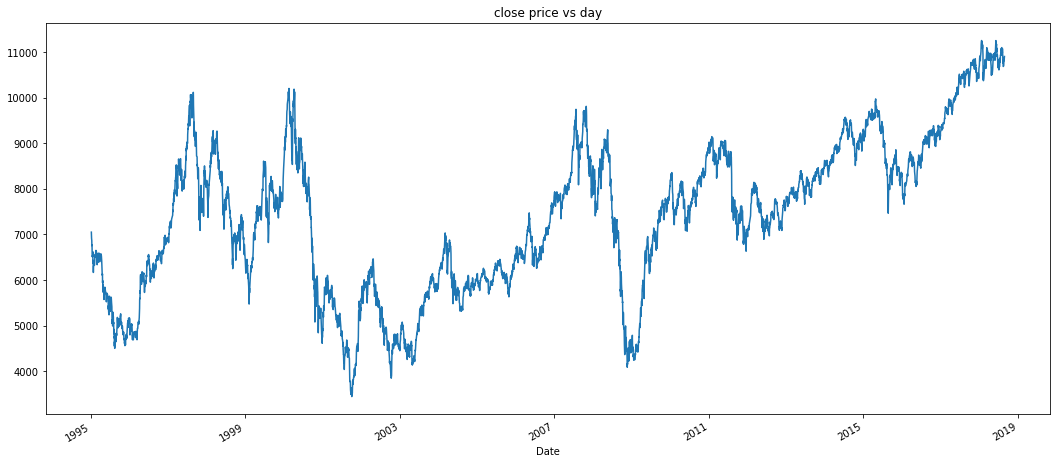

In [25]:
stock = stock.sort_index(ascending=True, axis=0)
print(stock.head())
stock.loc[:]['Close'].plot(figsize=(18, 8), title='close price vs day')

In [26]:
def processData(data, lb=30, shiftY=1):
    X,Y = [],[]
    for i in range(len(data)-lb-shiftY):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb+shiftY-1)])
    return np.array(X),np.array(Y)

In [27]:
window_size = 30
shift_predict_Y = 30
config_epochs = 120
config_lstm_size = 256

In [28]:
scl = MinMaxScaler(feature_range=(0, 1))

closes = stock['Close'].values
closes = closes.reshape(closes.shape[0],1)
closes = scl.fit_transform(closes)

X,y = processData(closes, window_size, shift_predict_Y)

In [29]:
print(len(stock))
print(len(X))

5924
5864


In [30]:
stock_split_index = len(X) - 3 * shift_predict_Y
print(stock_split_index)
X_train,X_test = X[:stock_split_index],X[stock_split_index:]
y_train,y_test = y[:stock_split_index],y[stock_split_index:]
print(len(X_train))
print(len(X_test))

5774
5774
90


In [31]:
test_i = 1
print(X[test_i])
print(y[test_i])
print(X[test_i + shift_predict_Y])

[[0.44487213]
 [0.44437129]
 [0.43843804]
 [0.42406604]
 [0.42667401]
 [0.40518775]
 [0.40171644]
 [0.39260905]
 [0.3958562 ]
 [0.39318419]
 [0.40698361]
 [0.40371725]
 [0.37476703]
 [0.38245003]
 [0.36490774]
 [0.34860795]
 [0.36549441]
 [0.36654861]
 [0.36917835]
 [0.38056579]
 [0.39523752]
 [0.39458681]
 [0.39672339]
 [0.39817852]
 [0.39951837]
 [0.39093232]
 [0.39174955]
 [0.40092867]
 [0.40993358]
 [0.40989516]]
[0.38263576]
[[0.41041265]
 [0.40563223]
 [0.40820177]
 [0.40446787]
 [0.39794411]
 [0.40346747]
 [0.40286415]
 [0.37688825]
 [0.39235671]
 [0.37038883]
 [0.38480693]
 [0.39331741]
 [0.39509918]
 [0.38795161]
 [0.38869711]
 [0.38169172]
 [0.37686135]
 [0.38520786]
 [0.38872529]
 [0.39156894]
 [0.38863946]
 [0.39823104]
 [0.39944408]
 [0.40323562]
 [0.40242864]
 [0.3964877 ]
 [0.39434727]
 [0.38847294]
 [0.38371302]
 [0.38263576]]


In [32]:
model = Sequential()
model.add(LSTM(config_lstm_size,input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=config_epochs,validation_data=(X_test,y_test),shuffle=False)

Train on 5774 samples, validate on 90 samples
Epoch 1/120
5774/5774 [==============================] - 9s 2ms/step - loss: 0.0091 - val_loss: 0.0025
Epoch 2/120
5774/5774 [==============================] - 8s 1ms/step - loss: 0.0164 - val_loss: 0.0051
Epoch 3/120
5774/5774 [==============================] - 8s 1ms/step - loss: 0.0150 - val_loss: 0.0027
Epoch 4/120
5774/5774 [==============================] - 8s 1ms/step - loss: 0.0109 - val_loss: 0.0033
Epoch 5/120
5774/5774 [==============================] - 9s 1ms/step - loss: 0.0089 - val_loss: 0.0035
Epoch 6/120
5774/5774 [==============================] - 9s 2ms/step - loss: 0.0079 - val_loss: 0.0034
Epoch 7/120
5774/5774 [==============================] - 9s 2ms/step - loss: 0.0074 - val_loss: 0.0035
Epoch 8/120
5774/5774 [==============================] - 9s 2ms/step - loss: 0.0072 - val_loss: 0.0034
Epoch 9/120
5774/5774 [==============================] - 9s 2ms/step - loss: 0.0070 - val_loss: 0.0035
Epoch 10/120
5774/5774 [===

5774/5774 [==============================] - 9s 2ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 80/120
5774/5774 [==============================] - 9s 2ms/step - loss: 0.0055 - val_loss: 0.0014
Epoch 81/120
5774/5774 [==============================] - 9s 2ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 82/120
5774/5774 [==============================] - 9s 2ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 83/120
5774/5774 [==============================] - 9s 1ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 84/120
5774/5774 [==============================] - 9s 2ms/step - loss: 0.0055 - val_loss: 0.0013
Epoch 85/120
5774/5774 [==============================] - 9s 2ms/step - loss: 0.0055 - val_loss: 0.0013
Epoch 86/120
5774/5774 [==============================] - 9s 2ms/step - loss: 0.0054 - val_loss: 0.0013
Epoch 87/120
5774/5774 [==============================] - 9s 2ms/step - loss: 0.0054 - val_loss: 0.0014
Epoch 88/120
5774/5774 [==============================] - 9s 2ms/step - loss:

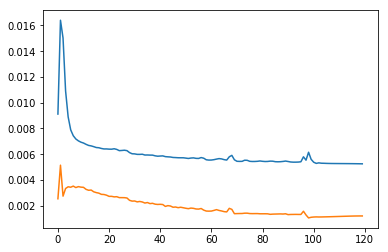

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

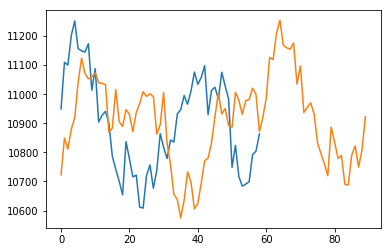

In [34]:
Xt = model.predict(X_test)
y_test1 = y_test[shift_predict_Y:-1]

plt.plot(scl.inverse_transform(y_test1.reshape(-1,1)))
#plt.plot(stock['Close'].values.reshape(-1,1))
plt.plot(scl.inverse_transform(Xt.reshape(-1, 1)))

In [35]:
model = Sequential()
model.add(LSTM(config_lstm_size, return_sequences=True, input_shape=(window_size,1)))
model.add(LSTM(config_lstm_size))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=config_epochs,validation_data=(X_test,y_test),shuffle=False)

Train on 5774 samples, validate on 90 samples
Epoch 1/120
5774/5774 [==============================] - 27s 5ms/step - loss: 0.0110 - val_loss: 0.0031
Epoch 2/120
5774/5774 [==============================] - 25s 4ms/step - loss: 0.0214 - val_loss: 0.0145
Epoch 3/120
5774/5774 [==============================] - 24s 4ms/step - loss: 0.0325 - val_loss: 6.3844e-04
Epoch 4/120
5774/5774 [==============================] - 24s 4ms/step - loss: 0.0237 - val_loss: 7.7352e-04
Epoch 5/120
5774/5774 [==============================] - 25s 4ms/step - loss: 0.0152 - val_loss: 0.0023
Epoch 6/120
5774/5774 [==============================] - 24s 4ms/step - loss: 0.0085 - val_loss: 0.0038
Epoch 7/120
5774/5774 [==============================] - 25s 4ms/step - loss: 0.0073 - val_loss: 0.0040
Epoch 8/120
5774/5774 [==============================] - 24s 4ms/step - loss: 0.0073 - val_loss: 0.0043
Epoch 9/120
5774/5774 [==============================] - 24s 4ms/step - loss: 0.0073 - val_loss: 0.0045
Epoch 10/1

5774/5774 [==============================] - 24s 4ms/step - loss: 0.0058 - val_loss: 0.0011
Epoch 79/120
5774/5774 [==============================] - 23s 4ms/step - loss: 0.0058 - val_loss: 0.0011
Epoch 80/120
5774/5774 [==============================] - 23s 4ms/step - loss: 0.0058 - val_loss: 0.0011
Epoch 81/120
5774/5774 [==============================] - 23s 4ms/step - loss: 0.0058 - val_loss: 0.0011
Epoch 82/120
5774/5774 [==============================] - 23s 4ms/step - loss: 0.0058 - val_loss: 0.0011
Epoch 83/120
5774/5774 [==============================] - 25s 4ms/step - loss: 0.0058 - val_loss: 0.0011
Epoch 84/120
5774/5774 [==============================] - 24s 4ms/step - loss: 0.0058 - val_loss: 0.0011
Epoch 85/120
5774/5774 [==============================] - 23s 4ms/step - loss: 0.0058 - val_loss: 0.0011
Epoch 86/120
5774/5774 [==============================] - 23s 4ms/step - loss: 0.0058 - val_loss: 0.0011
Epoch 87/120
5774/5774 [==============================] - 23s 4ms/st

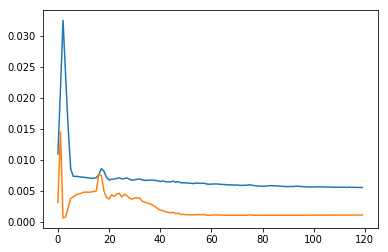

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

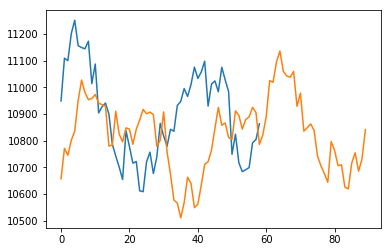

In [37]:
Xt = model.predict(X_test)
y_test1 = y_test[shift_predict_Y:-1]

plt.plot(scl.inverse_transform(y_test1.reshape(-1,1)))
#plt.plot(stock['Close'].values.reshape(-1,1))
plt.plot(scl.inverse_transform(Xt.reshape(-1, 1)))

In [38]:
model = Sequential()
model.add(LSTM(config_lstm_size, return_sequences=True, input_shape=(window_size,1)))
model.add(LSTM(config_lstm_size, return_sequences=True))
model.add(LSTM(config_lstm_size))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=config_epochs,validation_data=(X_test,y_test),shuffle=False)

Train on 5774 samples, validate on 90 samples
Epoch 1/120
5774/5774 [==============================] - 41s 7ms/step - loss: 0.0150 - val_loss: 0.0034
Epoch 2/120
5774/5774 [==============================] - 38s 7ms/step - loss: 0.0298 - val_loss: 0.0201
Epoch 3/120
5774/5774 [==============================] - 38s 7ms/step - loss: 0.0444 - val_loss: 0.0019
Epoch 4/120
5774/5774 [==============================] - 38s 7ms/step - loss: 0.0291 - val_loss: 9.5769e-04
Epoch 5/120
5774/5774 [==============================] - 38s 7ms/step - loss: 0.0176 - val_loss: 0.0049
Epoch 6/120
5774/5774 [==============================] - 38s 7ms/step - loss: 0.0103 - val_loss: 0.0059
Epoch 7/120
5774/5774 [==============================] - 37s 6ms/step - loss: 0.0080 - val_loss: 0.0057
Epoch 8/120
5774/5774 [==============================] - 37s 6ms/step - loss: 0.0078 - val_loss: 0.0061
Epoch 9/120
5774/5774 [==============================] - 39s 7ms/step - loss: 0.0080 - val_loss: 0.0065
Epoch 10/120
5

5774/5774 [==============================] - 38s 7ms/step - loss: 0.0063 - val_loss: 9.8283e-04
Epoch 78/120
5774/5774 [==============================] - 38s 7ms/step - loss: 0.0063 - val_loss: 9.9593e-04
Epoch 79/120
5774/5774 [==============================] - 39s 7ms/step - loss: 0.0062 - val_loss: 9.9363e-04
Epoch 80/120
5774/5774 [==============================] - 38s 7ms/step - loss: 0.0062 - val_loss: 0.0010
Epoch 81/120
5774/5774 [==============================] - 37s 6ms/step - loss: 0.0062 - val_loss: 9.9819e-04
Epoch 82/120
5774/5774 [==============================] - 37s 6ms/step - loss: 0.0062 - val_loss: 0.0010
Epoch 83/120
5774/5774 [==============================] - 38s 7ms/step - loss: 0.0062 - val_loss: 0.0010
Epoch 84/120
5774/5774 [==============================] - 39s 7ms/step - loss: 0.0062 - val_loss: 0.0010
Epoch 85/120
5774/5774 [==============================] - 39s 7ms/step - loss: 0.0062 - val_loss: 0.0010
Epoch 86/120
5774/5774 [============================

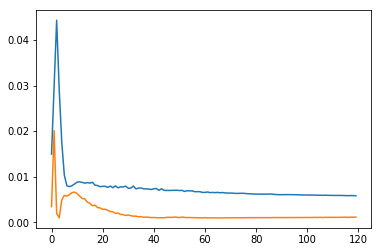

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

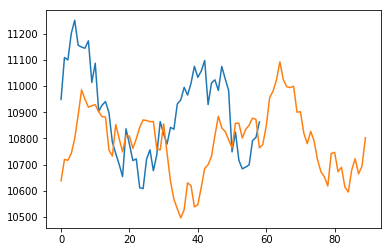

In [40]:
Xt = model.predict(X_test)
y_test1 = y_test[shift_predict_Y:-1]

plt.plot(scl.inverse_transform(y_test1.reshape(-1,1)))
#plt.plot(stock['Close'].values.reshape(-1,1))
plt.plot(scl.inverse_transform(Xt.reshape(-1, 1)))